In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.tbats   import TBATS
from sktime.forecasting.bats    import BATS

from sklearn.metrics import mean_squared_error

In [2]:
pdf = pd.read_csv("../../data/daily/ewz_stromabgabe_netzebenen_stadt_zuerich.csv",index_col=None)
pdf.index = pd.to_datetime(pdf['Timestamp'],utc=True)
pdf.index = pdf.index.tz_localize(None)  

pdf["y"] = (pdf["NE5_GWh"].values + pdf["NE7_GWh"].values)
pdf = pdf.drop(columns=["Timestamp","NE5_GWh","NE7_GWh"])

split = len(pdf)-365
pdf_train, pdf_test = pdf.iloc[:split], pdf.iloc[split:]

In [3]:
model = BATS(  
    sp=[7,365],
    n_jobs=-1)

model.fit(pdf_train.y)  

In [ ]:
y_pred = model.predict(fh=np.arange(len(pdf_test))) 
y_pred

2022-06-19    6.077681
2022-06-20    7.586442
2022-06-21    7.678972
2022-06-22    7.695762
2022-06-23    7.639083
                ...   
2023-06-14    7.677156
2023-06-15    7.654105
2023-06-16    7.581262
2023-06-17    6.556943
2023-06-18    6.085808
Freq: D, Name: y, Length: 365, dtype: float64

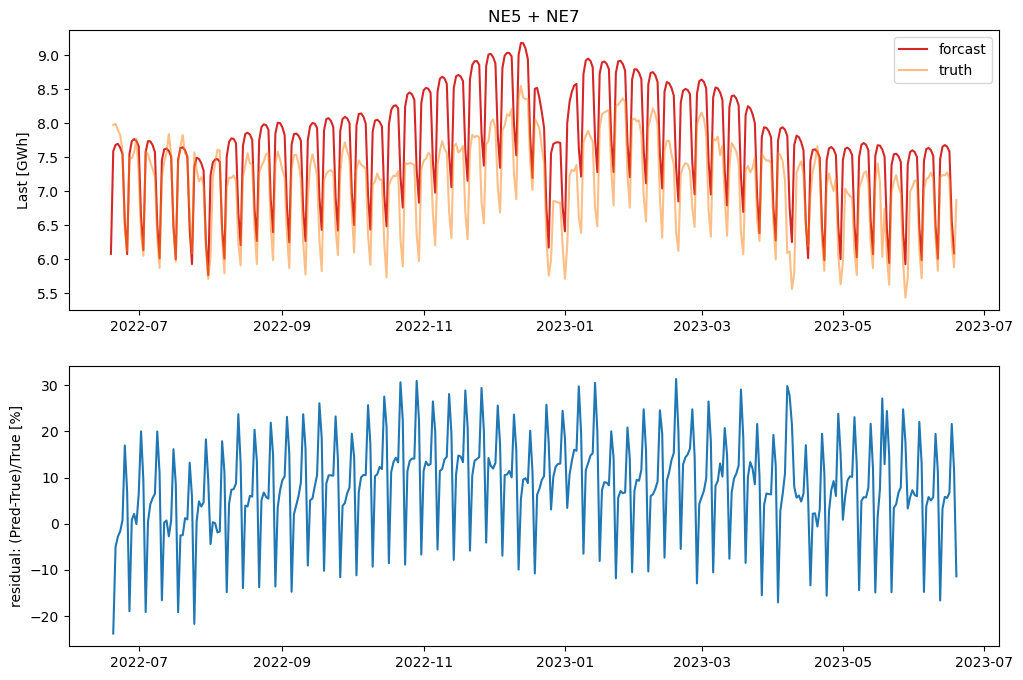

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(12, 8))


axes[0].plot(y_pred, color="tab:red", label="forcast")
# axes[0].plot(pdfTrain.ds.values, pdfTrain.y.values, color="tab:blue", label="train")
axes[0].plot(pdf_test, color="tab:orange", label="truth", alpha=0.5)
axes[0].legend()
axes[0].set_title("NE5 + NE7")
axes[0].set_ylabel("Last [GWh]")


xmin, xmax = axes[0].get_xlim()

axes[1].plot(pdf_test.index, (y_pred.values - pdf_test.y.values) / (pdf_test.y.values)*100)
axes[1].set_xlim(xmin, xmax)
axes[1].set_ylabel("residual: (Pred-True)/True [%]")

plt.show()

In [ ]:
rmseValue = mean_squared_error(pdf_test.y.values, y_pred.values, squared=False)
rmseValue

0.9312243239045974